In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow import keras
from sklearn.model_selection import train_test_split
import datetime

2025-06-24 10:03:36.909303: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-24 10:03:36.922897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-24 10:03:36.938724: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8463] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-24 10:03:36.942783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-24 10:03:36.954926: I tensorflow/core/platform/cpu_feature_guar

## (0): Required Functions:

### (0.1): SymPy Lambdify

In [2]:
def sympy_lambdify_expression(
        sympy_variables: list[sp.Symbol] | tuple[sp.Symbol, ...],
        sympy_expression: sp.Expr):
    """
    ## Description:
    Here, we assume you have defined (i) a collection of SymPy Symbols and
    (ii) a SymPy expression composed of those symbols. Now, we simply turn
    that SymPy function of those symbols into a Python function through
    SymPy's lambdify function.

    ## Arguments:
    1. `sympy_variables` (sp.Symbol)
    2. `sympy_expression` (int)
    """
    return sp.lambdify(sympy_variables, sympy_expression, 'numpy')

## (1.1): Define SymPy symbols:

In [3]:
independent_variable_symbols = sp.symbols("x y")

### (1.1.1): Verify the symbols worked:

In [4]:
independent_variable_symbols[0]

x

In [5]:
independent_variable_symbols[1]

y

## (1.2): Make an ansatz for $X(x)$ and $Y(y)$

In [6]:
# # X(x):
# X_function_of_x = independent_variable_symbols[0]**2 + sp.exp(independent_variable_symbols[0])

# # Y(y):
# Y_function_of_y = 1. / (0.05**2 + independent_variable_symbols[1]**2)

# # f(x, q):
# f_function_of_x_and_y = (independent_variable_symbols[0]**2 + sp.exp(independent_variable_symbols[0])) / (0.05**2 + independent_variable_symbols[1]**2)

In [7]:
# X(x):
X_function_of_x = sp.sin(independent_variable_symbols[0])

# Y(y):
Y_function_of_y = sp.exp(-1.0 * independent_variable_symbols[1]**2)

# f(x, q):
f_function_of_x_and_y = sp.sin(independent_variable_symbols[0]) * sp.exp(-1.0 * independent_variable_symbols[1]**2)


### (1.2.1): Verify the functions worked:

In [8]:
X_function_of_x

sin(x)

In [9]:
Y_function_of_y

exp(-1.0*y**2)

In [10]:
f_function_of_x_and_y

exp(-1.0*y**2)*sin(x)

## (1.3): Lambdify the symbolic functions:

In [11]:
lambdified_X_function_of_x = sympy_lambdify_expression(independent_variable_symbols[0], X_function_of_x)
lambdified_Y_function_of_y = sympy_lambdify_expression(independent_variable_symbols[1], Y_function_of_y)
lambdified_f_function_of_x_and_y = sympy_lambdify_expression(independent_variable_symbols, f_function_of_x_and_y)

### (1.3.1): Testing N(x):

In [12]:
lambdified_X_function_of_x(0)

0.0

### (1.3.2): Testing F(q)

In [13]:
lambdified_Y_function_of_y(0)

1.0

### (1.3.3): Testing $f(x, y)$:

In [14]:
lambdified_f_function_of_x_and_y(0., 0.)

0.0

## (1.4): Visualizing the Functions:

### (1.4.1): Matplotlib rcParams:

For clarity and a somewhat professional appearance.

In [15]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}"
})
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

### (1.4.2): Generating some Random $x$ and $y$ values:

In [16]:
x_domain_values = np.random.uniform(low = -1., high = 1., size = 10000).astype(np.float32)
y_domain_values = np.random.uniform(low = -1., high = 1., size = 10000).astype(np.float32)

function_f_values = lambdified_f_function_of_x_and_y(x_domain_values, y_domain_values).astype(np.float32)

### (1.4.3): Visualizing the "input space":

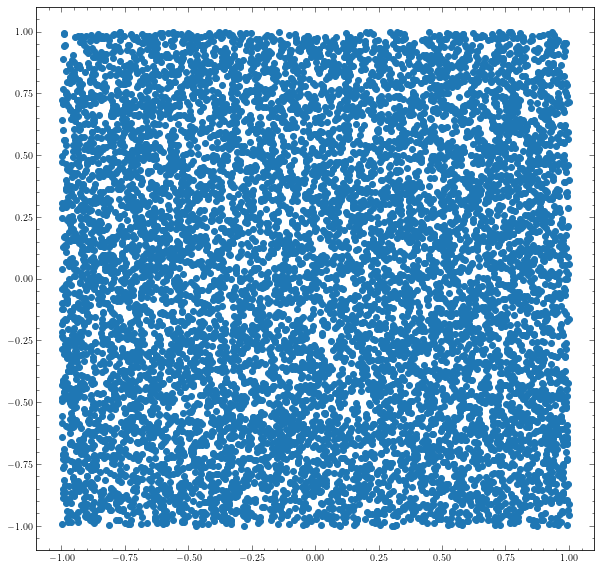

In [17]:
input_space_figure = plt.figure(figsize = (10, 10))
input_space_axis = input_space_figure.add_subplot(1, 1, 1)
input_space_axis.scatter(x_domain_values, y_domain_values)

### (1.4.3): Visualizing $X(x)$ vs. $x$:

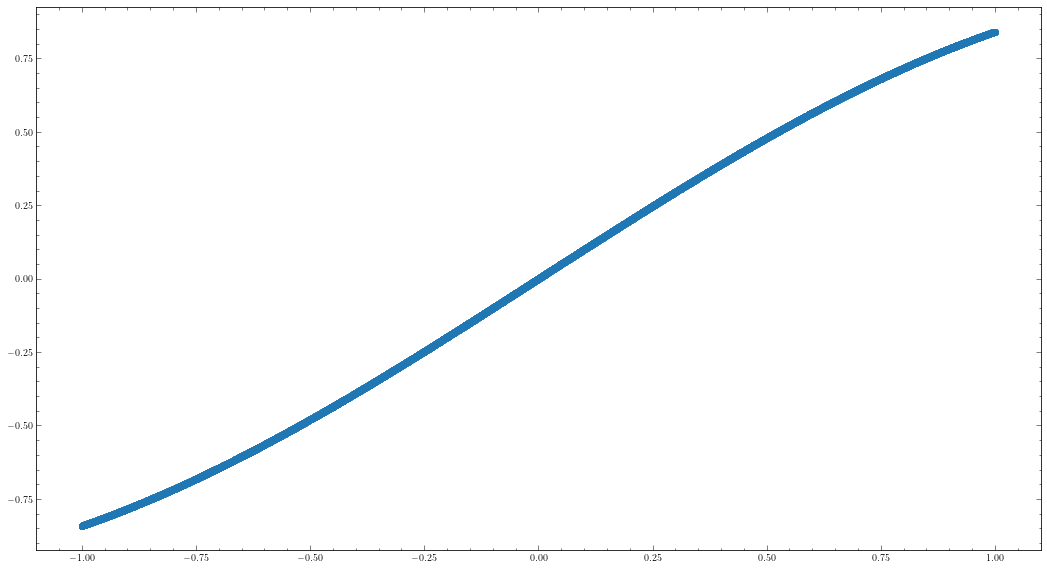

In [18]:
function_x_values = lambdified_X_function_of_x(x_domain_values)

n_vs_x_figure = plt.figure(figsize = (18, 10))
n_vs_x_axis = n_vs_x_figure.add_subplot(1, 1, 1)
n_vs_x_axis.scatter(x_domain_values, function_x_values)

### (1.4.2): Visualizing $Y(y)$ vs. $y$:

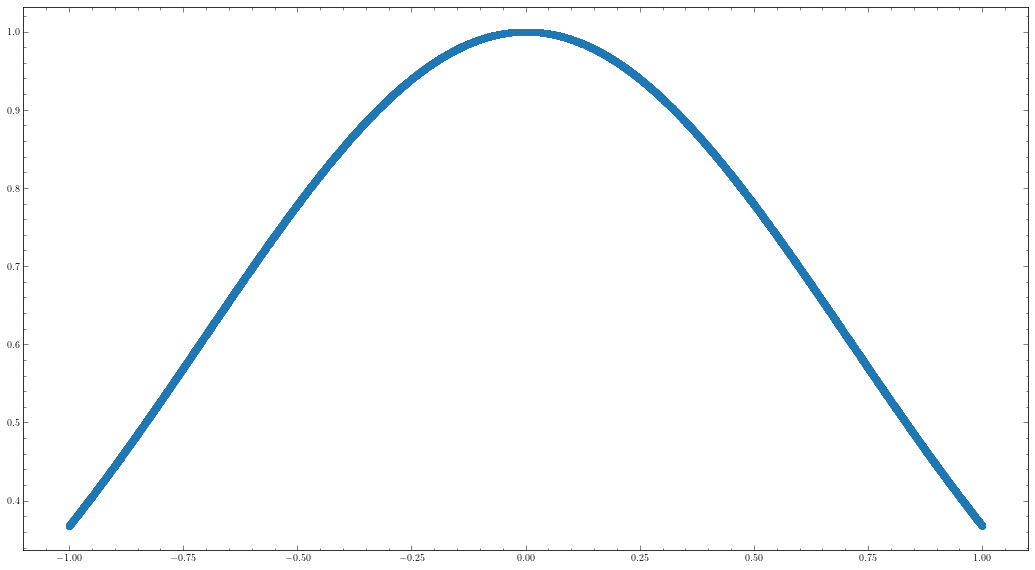

In [19]:
function_y_values = lambdified_Y_function_of_y(y_domain_values)

f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1)
f_vs_p_axis.scatter(y_domain_values, function_y_values)

### (1.4.3): Visualizing Product $X(x)Y(y)$:

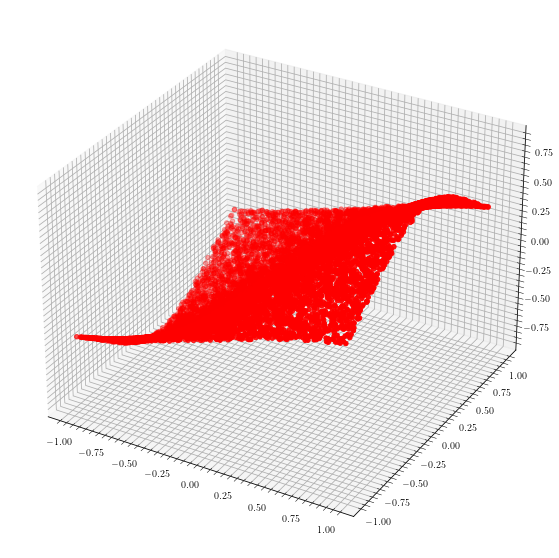

In [20]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_domain_values, y_domain_values, function_x_values * function_y_values, color = 'red')

### (1.4.4): Visualizing Function $f(x, y)$:

What we should see here is the *exact same* as what we got above. There should be absolutely *no difference.*

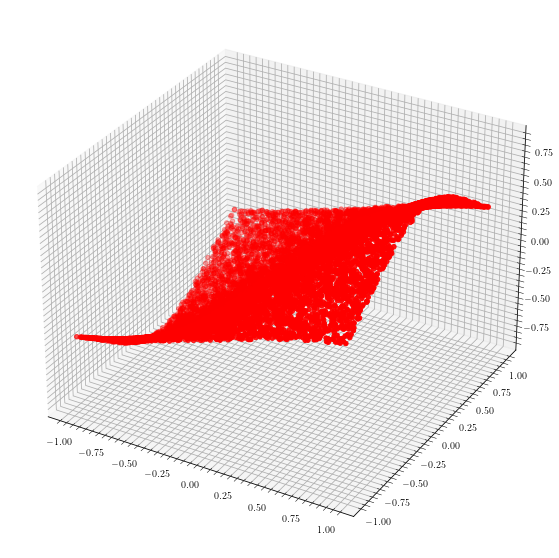

In [21]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_domain_values, y_domain_values, function_f_values, color = 'red')

### (1.4.4): Showing values of $f(x, y) - N(x) Y(y) \approx 0$ for all elements:

We can also figure out what is going on by computing the element-wise difference:

In [22]:
function_f_values - function_x_values * function_y_values

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

### (1.5): Normalizing Data:

#### (1.5.1): Pre-Normalization:

We first need to show that the input data falls within the first quadrant.

In [23]:
print(f"> Max x-value is: {np.max(x_domain_values)}")
print(f"> Min x-value is: {np.min(x_domain_values)}")
print(f"> Max y-value is: {np.max(y_domain_values)}")
print(f"> Min y-value is: {np.min(y_domain_values)}")

print(f"> Max normalized X(x) is: {np.max(function_x_values)}")
print(f"> Min normalized X(x) is: {np.min(function_x_values)}")
print(f"> Max normalized Y(y) is: {np.max(function_y_values)}")
print(f"> Min normalized Y(y) is: {np.min(function_y_values)}")

> Max x-value is: 0.999859094619751
> Min x-value is: -0.9998513460159302
> Max y-value is: 0.9999906420707703
> Min y-value is: -0.9999242424964905
> Max normalized X(x) is: 0.84139484167099
> Min normalized X(x) is: -0.8413906693458557
> Max normalized Y(y) is: 1.0
> Min normalized Y(y) is: 0.3678863048553467


#### (1.5.2): Normalizing:

In [24]:
# (): Normalizing input x values:
maximum_x_value = np.max(x_domain_values)
minimum_x_value = np.min(x_domain_values)

# (): The line below actually normalizes x input values:
x_domain_values_normalized = (x_domain_values - minimum_x_value) / (maximum_x_value - minimum_x_value)

# (): Normalizing input y values:
maximum_y_value = np.max(y_domain_values)
minimum_y_value = np.min(y_domain_values)

# (): The line below actually normalizes y input values:
y_domain_values_normalized = (y_domain_values - minimum_y_value) / (maximum_y_value - minimum_y_value)

# (): Prepare to normalize X(x) values:
maximum_x_function_value = np.max(function_x_values)
minimum_x_function_value = np.min(function_x_values)

# (): Actually normalize X(x) values:
function_x_values_normalized = (function_x_values - minimum_x_function_value) / (maximum_x_function_value - minimum_x_function_value)

# (): Prepare to normalize Y(y) values:
maximum_y_function_value = np.min(function_y_values)
minimum_y_function_value = np.max(function_y_values)

# (): Actually normalize Y(y) values:
function_y_values_normalized = (function_y_values- minimum_y_function_value) / (maximum_y_function_value - minimum_y_function_value)

# (): Prepare to normalize f(x, y) values:
maximum_f_function_value = np.max(function_f_values)
minimum_f_function_value = np.min(function_f_values)

# (): Actually normalize f(x, y) values:
f_values_normalized = (function_f_values- minimum_f_function_value) / (maximum_f_function_value - minimum_f_function_value)

##### (1.5.2.1): Checking Normalization Effects:

In [25]:
print(f"> Max normalized x-value is: {np.max(x_domain_values_normalized)}")
print(f"> Min normalized x-value is: {np.min(x_domain_values_normalized)}")
print(f"> Max normalized y-value is: {np.max(y_domain_values_normalized)}")
print(f"> Min normalized y-value is: {np.min(y_domain_values_normalized)}")

print(f"> Max normalized X(x) is: {np.max(function_x_values_normalized)}")
print(f"> Min normalized X(x) is: {np.min(function_x_values_normalized)}")
print(f"> Max normalized Y(y) is: {np.max(function_y_values_normalized)}")
print(f"> Min normalized Y(y) is: {np.min(function_y_values_normalized)}")

> Max normalized x-value is: 1.0
> Min normalized x-value is: 0.0
> Max normalized y-value is: 1.0
> Min normalized y-value is: 0.0
> Max normalized X(x) is: 1.0
> Min normalized X(x) is: 0.0
> Max normalized Y(y) is: 1.0
> Min normalized Y(y) is: -0.0


#### (1.5.2): Visualizing the Normalization

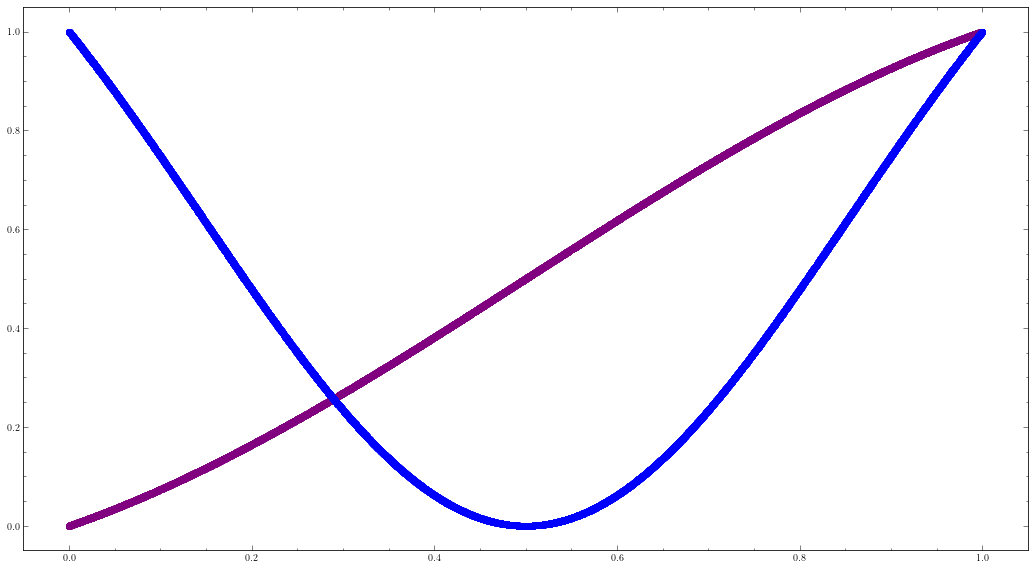

In [26]:
analysis_figure = plt.figure(figsize = (18, 10))
analysis_axis = analysis_figure.add_subplot(1, 1, 1)
analysis_axis.scatter(x_domain_values_normalized, function_x_values_normalized, color = "purple")
analysis_axis.scatter(y_domain_values_normalized, function_y_values_normalized, color = "blue")

## (2): Building the DNN for $f(x, y) = X(x) Y(y)$

### (2.1): DNN Hyperparameter Settings:

In [27]:
SETTING_VERBOSE = True
SETTING_DEBUG = True

LEARNING_RATE = 0.01

BATCH_SIZE_LOCAL_FITS = 32
BATCH_SIZE_GLOBAL_FITS = 10

EARLY_STOP_PATIENCE = 20
LEARNING_RATE_PATIENCE = 20
MODIFY_LR_FACTOR = 0.9
SETTING_DNN_TRAINING_VERBOSE = 1

EPOCHS = 200

### (2.2): DNN Architecture:

In [28]:
dnn_network_input = Input(
    shape = (2, ),
    name = 'input_layer')

# (3): Define the Model Architecture:
x1 = Dense(32, activation = "relu")(dnn_network_input)
x2 = Dense(16, activation = "relu")(x1)
x3 = Dense(16, activation = "relu")(x2)
x4 = Dense(16, activation = "relu")(x3)
dnn_network_output = Dense(1, activation = "linear", name = 'output_y_value')(x4)

# (4): Define the model as as Keras Model:
tensorflow_network = Model(
    inputs = dnn_network_input,
    outputs = dnn_network_output,
    name = "basic_function_predictor")

tensorflow_network.compile(
    optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [
        tf.keras.metrics.MeanSquaredError()
        ])

tensorflow_network.summary()

I0000 00:00:1750777421.251435 1861361 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750777421.291269 1861361 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750777421.291476 1861361 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1750777421.293107 1861361 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "basic_function_predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_y_value (Dense)          │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

## (3): DNN Data Preprocessing:

### (3.1): Data Index Splitting:

In [29]:

# (): Stack along the "horizonal" direction --- in our case, it will effectively make tuples:
xy_pairs = np.stack(
    arrays = (x_domain_values, y_domain_values), 
    axis = 1)

# (): This will just extract the total number of tuples:
number_of_samples = xy_pairs.shape[0]

# (): This creates a NumPy array of numbers from 0 to len(input-array) - 1,
# | so it is ideal to construct a NumPy array of *indices*:
indices = np.arange(number_of_samples)

# (): Now, shuffle the index array:
np.random.shuffle(indices)

In [30]:
# (): Here. we verify the "tuple stacking":
xy_pairs

array([[ 0.33031222,  0.07622618],
       [-0.19134876,  0.74402636],
       [-0.82211465,  0.9770454 ],
       ...,
       [ 0.01531432, -0.86234254],
       [-0.18907773,  0.9848396 ],
       [-0.5646665 , -0.95073825]], dtype=float32)

### (3.2): Data Splitting:

We need to split the data into (i) training data, (ii) validation data, and (iii) testing pieces.

In [31]:
# (): The *percentage* as a decimal that we split input data into testing:
split_testing_percentage = 0.2

# (): Similarly for the validation:
split_validation_percentage = 0.1

split_testing = int(number_of_samples * split_testing_percentage)
split_validation = int(number_of_samples * split_validation_percentage)

validation_indices = indices[split_testing:split_testing + split_validation]
validation_x_data = xy_pairs[validation_indices]
validation_y_data = function_f_values[validation_indices]

training_indices = indices[split_testing + split_validation:]
training_x_data = xy_pairs[training_indices]
training_y_data = function_f_values[training_indices]

testing_indices = indices[:split_testing]
testing_x_data = xy_pairs[testing_indices]
testing_y_data = function_f_values[testing_indices]

## (4): DNN Training and Evaluation:

### (4.1): DNN Training:

In [32]:
start_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)

history_of_training = tensorflow_network.fit(
    training_x_data,
    training_y_data,
    validation_data = (testing_x_data, testing_y_data),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE_LOCAL_FITS,
    verbose = SETTING_DNN_TRAINING_VERBOSE)

end_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)
print(f"> Replica job finished in {end_time_in_milliseconds - start_time_in_milliseconds}ms.")

Epoch 1/200


I0000 00:00:1750777422.483624 1861448 service.cc:146] XLA service 0x7cfd380046c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750777422.483654 1861448 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2025-06-24 10:03:42.507507: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-24 10:03:42.640585: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


129/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0243 - mean_squared_error: 0.0243

I0000 00:00:1750777423.215294 1861448 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 2.6496e-04 - val_mean_squared_error: 2.6496e-04
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2876e-04 - mean_squared_error: 3.2876e-04 - val_loss: 1.6869e-04 - val_mean_squared_error: 1.6869e-04
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4772e-04 - mean_squared_error: 1.4772e-04 - val_loss: 7.4926e-04 - val_mean_squared_error: 7.4926e-04
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1054e-04 - mean_squared_error: 3.1054e-04 - val_loss: 4.3792e-05 - val_mean_squared_error: 4.3792e-05
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6071e-05 - mean_squared_error: 6.6071e-05 - val_loss: 2.0976e-04 - val_mean_squared_error: 2.0976e-04
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2418e-04 - mean_squared_error: 2.2418e-04 - val_loss: 9.9222e-05 - val_mean_squared_error: 9.9222e-05
Epoch 7/200
219/219 ━━━━━━━━━━

### (4.2): DNN Evaluation:

### (4.2.1): Extract Evaluation Data:

In [33]:
training_loss_data = history_of_training.history['loss']
validation_loss_data = history_of_training.history['val_loss']

#### (4.2.2): Perform Evaluation:

In [34]:
validaton_loss, validation_mae = tensorflow_network.evaluate(testing_x_data, testing_y_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1738e-05 - mean_squared_error: 1.1738e-05  


#### (4.2.3): Visualize Evaluation:

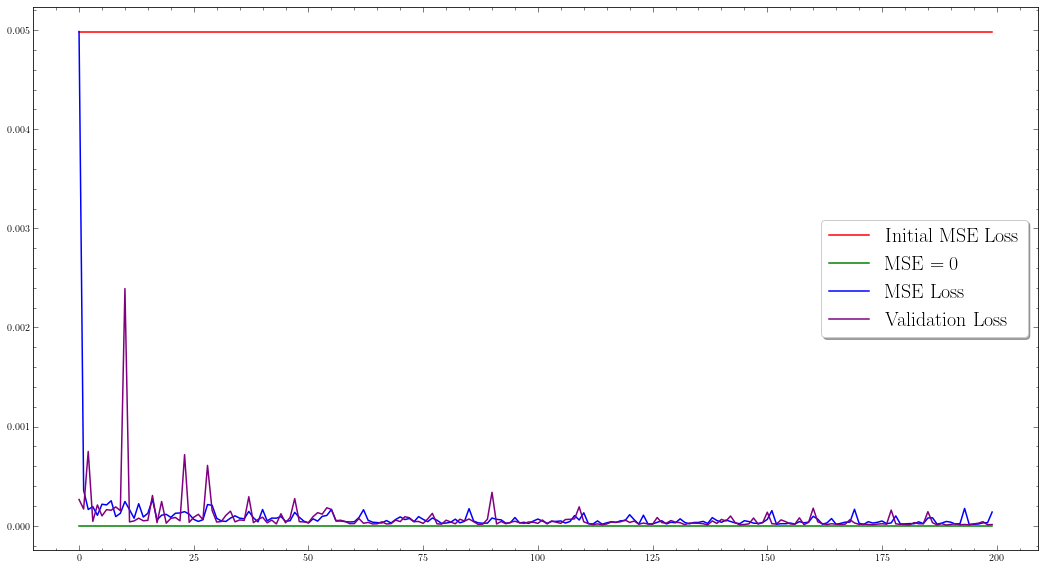

In [35]:
evaluation_figure = plt.figure(figsize = (18, 10))
evaluation_axis = evaluation_figure.add_subplot(1, 1, 1)
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.array([np.max(training_loss_data) for number in training_loss_data]), color = "red", label = "Initial MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.zeros(shape = EPOCHS), color = "green", label = r"MSE $= 0$")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), training_loss_data, color = "blue", label = "MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), validation_loss_data, color = "purple", label = "Validation Loss")
evaluation_axis.legend(fontsize = 20, shadow = True)

## (5): DNN Predictions:

### (5.1): Numerical Predictions:

In [36]:
model_predictions = np.array(tensorflow_network.predict(training_x_data))

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### (5.2): Visualizing Predictions:

#### (5.2.1): Scatter Plot:

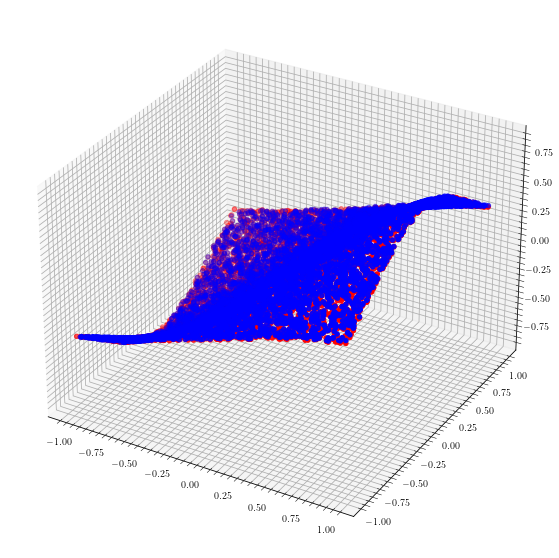

In [37]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_domain_values, y_domain_values, lambdified_f_function_of_x_and_y(x_domain_values, y_domain_values), color = 'red')
f_vs_p_axis.scatter(training_x_data[:,0], training_x_data[:,1], model_predictions, color = 'blue')

#### (5.2.2): Surface Plot:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


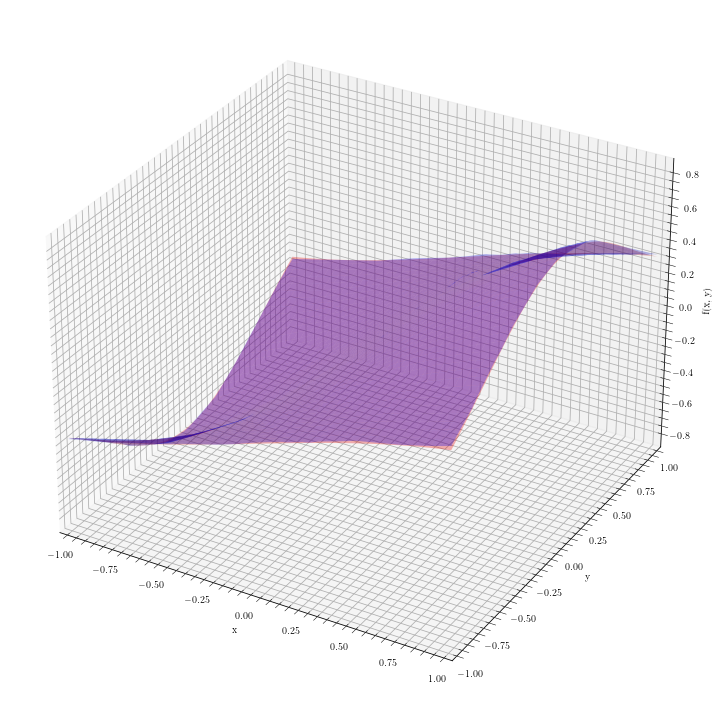

In [38]:
x_min, x_max = x_domain_values.min(), x_domain_values.max()
y_min, y_max = y_domain_values.min(), y_domain_values.max()

x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100))

grid_points = np.c_[
    x_grid.ravel(), 
    y_grid.ravel()]

z_true = lambdified_f_function_of_x_and_y(grid_points[:, 0], grid_points[:, 1]).reshape(x_grid.shape)
z_model = tensorflow_network.predict(grid_points).reshape(x_grid.shape)

surface_plot_figure = plt.figure(figsize = (18, 10))
surface_plot_axis = surface_plot_figure.add_subplot(1, 1, 1, projection = '3d')

surface_plot_axis.plot_surface(x_grid, y_grid, z_true, color = 'red', alpha = 0.3, label = 'True Function')
surface_plot_axis.plot_surface(x_grid, y_grid, z_model, color = 'blue', alpha = 0.3, label = 'Model Prediction')

surface_plot_axis.set_xlabel('x')
surface_plot_axis.set_ylabel('y')
surface_plot_axis.set_zlabel('f(x, y)')

surface_plot_axis.set_xlim(-1, 1)
surface_plot_axis.set_ylim(-1, 1)

surface_plot_axis.view_init(elev = 30, azim = -60) 

plt.tight_layout()
plt.show()

### (5.2.3): Surface Subtraction Plot:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


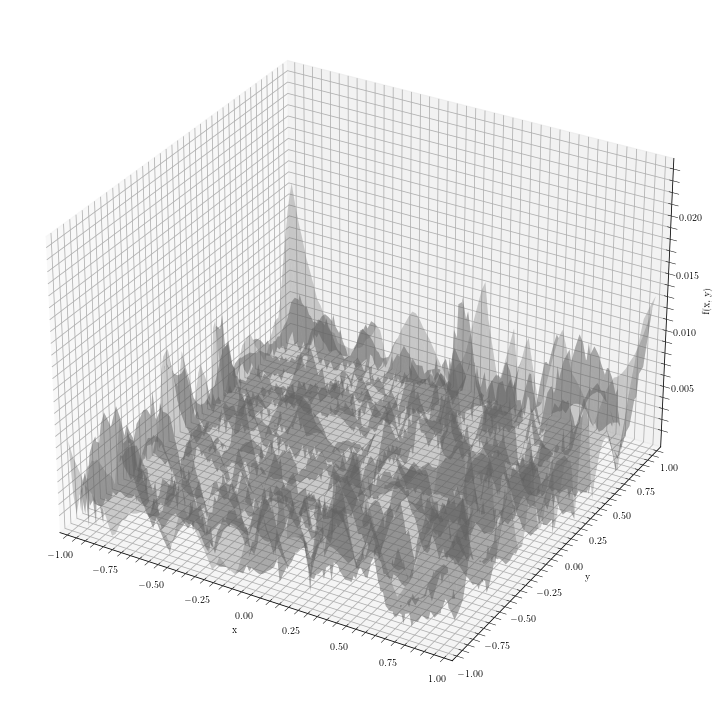

In [39]:
x_min, x_max = x_domain_values.min(), x_domain_values.max()
y_min, y_max = y_domain_values.min(), y_domain_values.max()

x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100))

grid_points = np.c_[
    x_grid.ravel(), 
    y_grid.ravel()]

z_true = lambdified_f_function_of_x_and_y(grid_points[:, 0], grid_points[:, 1]).reshape(x_grid.shape)
z_model = tensorflow_network.predict(grid_points).reshape(x_grid.shape)

surface_plot_figure = plt.figure(figsize = (18, 10))
surface_plot_axis = surface_plot_figure.add_subplot(1, 1, 1, projection = '3d')

surface_plot_axis.plot_surface(x_grid, y_grid, np.abs(z_true - z_model), color = 'gray', alpha = 0.3, label = 'True Function')

surface_plot_axis.set_xlabel('x')
surface_plot_axis.set_ylabel('y')
surface_plot_axis.set_zlabel('f(x, y)')

surface_plot_axis.set_xlim(-1, 1)
surface_plot_axis.set_ylim(-1, 1)

surface_plot_axis.view_init(elev = 30, azim = -60) 

plt.tight_layout()
plt.show()

## (6): Try to Fix $X(x)$ Only with $Y(y)$ Known:

### (6.1): DNN Architecture for Only $X(x)$:

We need to understand that this DNN is different from the previous one in its input; it only takes in $x$, not and $x$ and $y$. Remember that we're trying to represent $X(x)$ with and $X^{\text{DNN}}(x)$.

Note that the loss we are using here is custom, and it is defined according to:

$$L_{\text{MSE}}(\hat{\vec{y}}, \vec{y}) := \frac{1}{N} \sum_{i = 1}^{N} ||f(x, y)- X^{\text{DNN}}(x)Y(y)||_{2}^{2}.$$

In [40]:
# x_input = tf.keras.Input(shape = (2,))
# x_dropout = Lambda(lambda x: x[:, 0:1])(x_input)
# x1 = Dense(32, activation = 'relu', kernel_initializer = 'glorot_uniform')(x_dropout)
# x1_dropout = Dropout(0.1)(x1, training = True)
# x2 = Dense(32, activation = 'relu', kernel_initializer = 'glorot_uniform')(x1_dropout)
# x2_dropout = Dropout(0.1)(x1, training = True)
# x3 = Dense(16, activation = 'relu', kernel_initializer = 'glorot_uniform')(x2_dropout)
# x_output = Dense(1)(x3)

# tensorflow_model_for_x_function = tf.keras.Model(
#     inputs = x_input, 
#     outputs = x_output)

model = tf.keras.Sequential([
    Input(shape=(2,)),
    Lambda(lambda x: x[:, 0:1]),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1)
])

@tf.function
def custom_loss(true_f_values, X_predicted, Y_values):
    """
    ## Description:
    Computes MSE of:  f(x, y) - X^{DNN}(x) Y(y)
    
    ## Arguments:
        - true_f_values: normalized values of f(x, y)
        - X_predicted: predicted normalized X(x)
        - Y_values: known Y(y) values

    ## Notes:
    This loss will get .call()'ed with `y_true` and `y_pred`.
    """

    # (4): Un-normalize f(x, y):
    predicted_f_value = X_predicted * Y_values

    # (): Compue the total error:
    residuals = predicted_f_value - true_f_values

    # (): Compute the mean:
    mean_residuals = tf.reduce_mean(tf.square(residuals))
    
    # (): Return the computed loss:
    return mean_residuals
    

### (6.2): DNN Hyperparameters:

The DNN hyperparameters for $X^{\text{DNN}}(x)$ don't need to change much. So, let's just skip this for now.

### (6.3): Data Preprocessing

#### (6.3.1): Data Index Splitting:

In [41]:
x_training, x_validation, y_training, y_validation, f_training, f_validation = train_test_split(
    x_domain_values,
    y_domain_values,
    function_f_values,
    test_size = 0.2,
    random_state = 42)

# x_training = x_domain_values_normalized
# y_training = y_values_normalized
# f_training = f_values_normalized

training_dataset = tf.data.Dataset.from_tensor_slices(
    tensors = ((x_training, y_training), f_training))

validation_dataset = tf.data.Dataset.from_tensor_slices(
    tensors = ((x_validation, y_validation), f_validation))

training_dataset = training_dataset.shuffle(buffer_size = 1024).batch(BATCH_SIZE_GLOBAL_FITS)
validation_dataset = validation_dataset.batch(BATCH_SIZE_GLOBAL_FITS)

In [42]:
print(len(x_training))
print(len(y_training))
print(len(f_training))

8000
8000
8000


### (6.4): DNN Training and Evaluation:

#### (6.4.1): DNN Training:

In [43]:
class CustomModel(tf.keras.Model):
    def __init__(self, tf_model):
        super(CustomModel, self).__init__()

        self.model = tf_model

    def train_step(self, data):
        
        # (X): Unpack the data that is used in training:
        (xy_pairs, function_y_values), true_f_values = data

        with tf.GradientTape() as gradient_tape:

            predicted_X_value = self.model(xy_pairs, training = True)

            computed_loss = custom_loss(true_f_values, predicted_X_value, function_y_values)

        gradients = gradient_tape.gradient(computed_loss, self.trainable_variables)

        self.optimizer.apply_gradients(
            zip(
                gradients,
                self.trainable_variables))
        
        return {"loss": computed_loss}
    
tensorflow_model_for_x_function = CustomModel(model)
tensorflow_model_for_x_function.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE))

history = tensorflow_model_for_x_function.fit(
    (xy_pairs, function_y_values.reshape(-1, 1)),
    function_f_values.reshape(-1, 1),
    # validation_data = (testing_x_data, testing_y_data),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE_LOCAL_FITS,
    verbose = SETTING_DNN_TRAINING_VERBOSE)

training_loss_history = history.history['loss']

Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0012
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5283e-06
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6313e-06
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6979e-06
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9177e-04
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7552e-06
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2509e-06
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1693e-06
Epoch 9/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8147e-06
Epoch 10/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0835e-05
Epoch 11/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9194e-06
Epoch 12/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3784e-05
Epoch 13/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1446e-05
Epoch 14/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.

What is commented out below did not work. It remains to be determined why it did not.

In [44]:
# optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE)

# training_loss_history = []
# validation_loss_history = []

# start_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)

# for current_epoch in range(EPOCHS):
#     current_epoch_training_loss = 0.

#     for (x_batch, y_batch), f_batch in training_dataset:
#         with tf.GradientTape() as gradient_tape:

#             predicted_x_value = tensorflow_model_for_x_function(
#                 x_batch, 
#                 training = True)

#             loss = custom_loss(f_batch, predicted_x_value, y_batch)

#         gradients = gradient_tape.gradient(
#             loss, 
#             tensorflow_model_for_x_function.trainable_variables)

#         optimizer.apply_gradients(
#             zip(
#                 gradients, 
#                 tensorflow_model_for_x_function.trainable_variables))

#         current_epoch_training_loss += loss.numpy()

#     current_epoch_validation_loss = 0.
    
#     for (x_batch, y_batch), f_batch in validation_dataset:

#         predicted_x_value = tensorflow_model_for_x_function(x_batch, training = False)

#         loss = custom_loss(f_batch, predicted_x_value, y_batch)

#         current_epoch_validation_loss += loss.numpy()

#     current_epoch_validation_loss /= len(validation_dataset)

#     training_loss_history.append(current_epoch_training_loss / len(training_dataset))
#     validation_loss_history.append(current_epoch_validation_loss)

#     print(f"> Epoch #{current_epoch} found L = {current_epoch_training_loss:.4f} & LV = {current_epoch_validation_loss:.4f}")

# end_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)
# print(f"> Replica job finished in {end_time_in_milliseconds - start_time_in_milliseconds}ms.")


#### (6.4.2): DNN Evaluation:

##### (6.4.2.1): Visualize Evaluation:

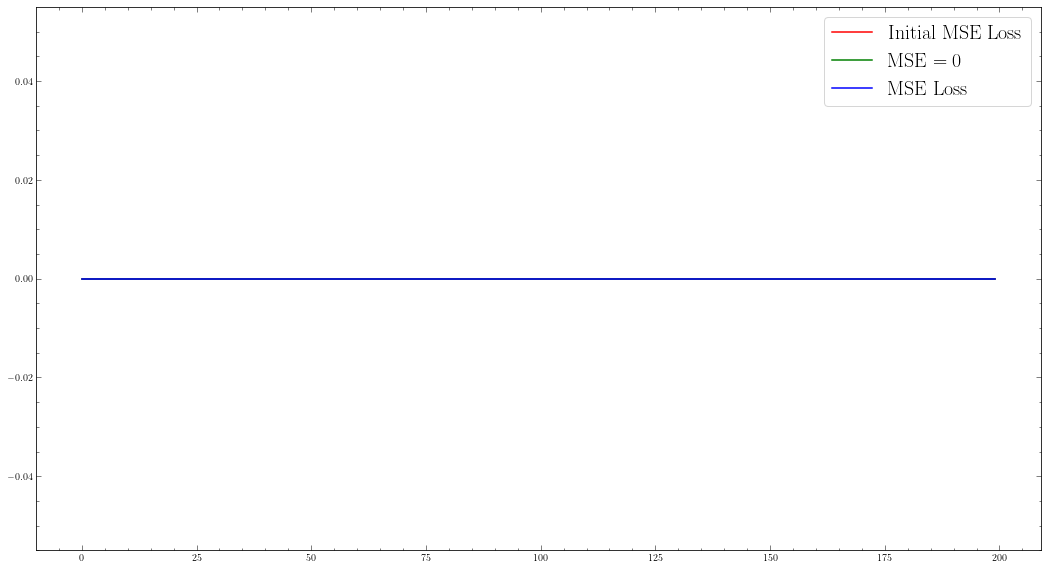

In [45]:
evaluation_figure = plt.figure(figsize = (18, 10))
evaluation_axis = evaluation_figure.add_subplot(1, 1, 1)
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.array([np.max(training_loss_history) for number in training_loss_history]), color = "red", label = "Initial MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.zeros(shape = EPOCHS), color = "green", label = r"MSE $= 0$")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), training_loss_history, color = "blue", label = "MSE Loss")
# evaluation_axis.plot(np.arange(0, EPOCHS, 1), validation_loss_history, color = "purple", label = "Validation Loss")
evaluation_axis.legend(fontsize = 20)

### (6.5): DNN Predictions:

#### (6.5.1): Numerical Predictions:

In [46]:
model_predictions = np.array(model.predict(xy_pairs))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


#### (6.5.2): Visualizing Predictions:

##### (6.5.2.1): Scatterplot for just $N(x)$ vs. $x$:

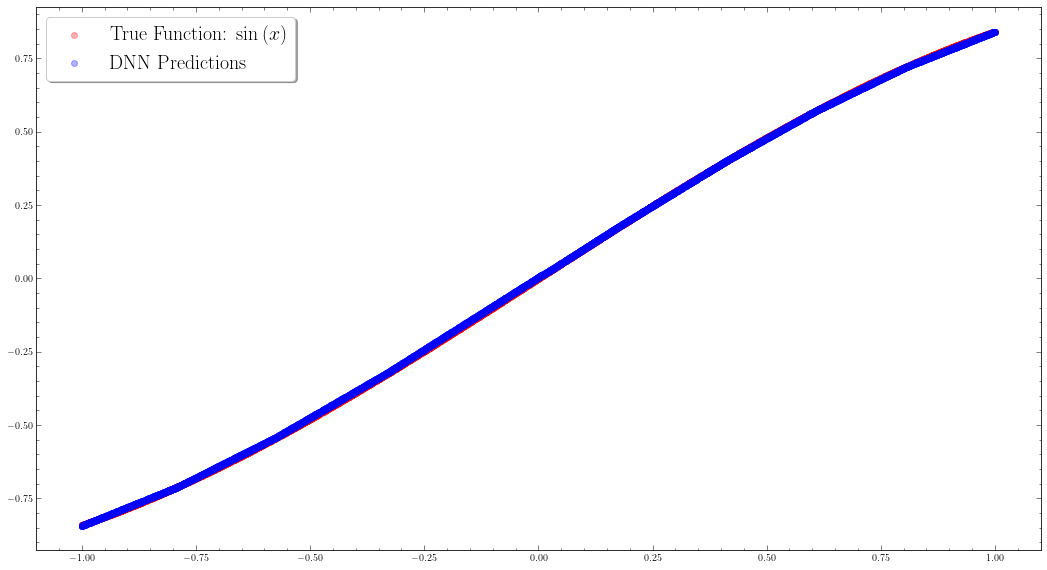

In [47]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1)
f_vs_p_axis.scatter(x_domain_values, function_x_values, color = 'red', alpha = 0.3, label = rf"True Function: ${sp.latex(X_function_of_x)}$")
f_vs_p_axis.scatter(x_domain_values, model_predictions, color = 'blue', alpha = 0.3, label = "DNN Predictions")
plt.legend(fontsize = 20, shadow = True)

##### (6.5.2.1): Scatterplot for $X^{\text{DNN}}(x) Y(y)$:

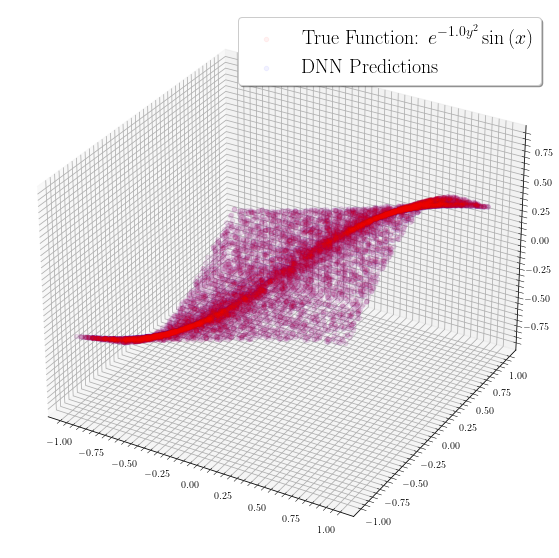

In [56]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_domain_values, y_domain_values, function_f_values, color = 'red', alpha = 0.05, label = rf"True Function: ${sp.latex(f_function_of_x_and_y)}$")
f_vs_p_axis.scatter(x_domain_values, y_domain_values, model_predictions.ravel() * function_y_values, color = 'blue', alpha = 0.05, label = "DNN Predictions")
plt.legend(fontsize = 20, shadow = True)

##### (6.5.2.3): Surface Plot for just $N(x)$ vs. $x$:

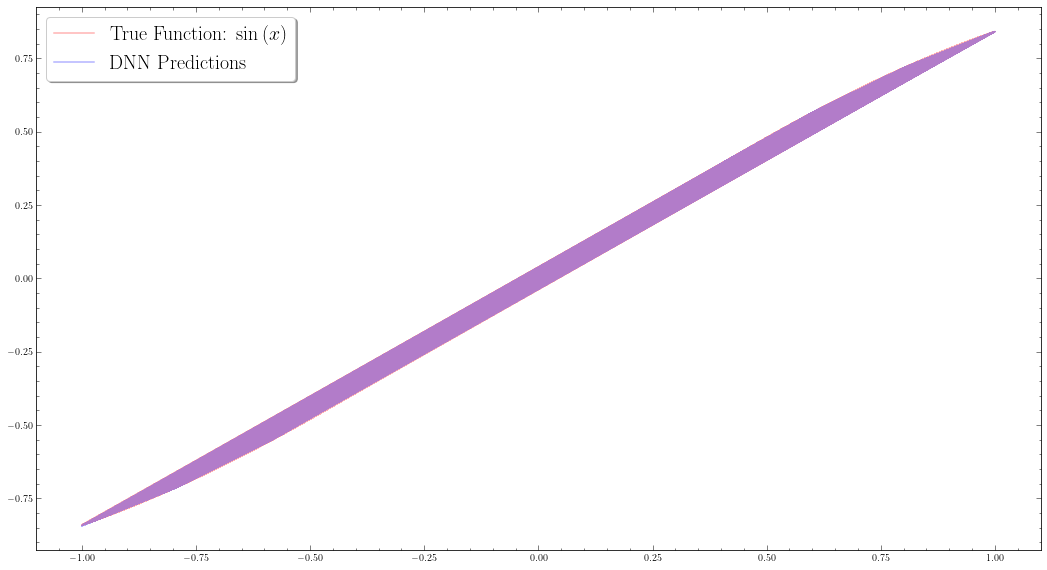

In [49]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1)
f_vs_p_axis.plot(x_domain_values, function_x_values, color = 'red', alpha = 0.3, label = rf"True Function: ${sp.latex(X_function_of_x)}$")
f_vs_p_axis.plot(x_domain_values, model_predictions, color = 'blue', alpha = 0.3, label = "DNN Predictions")
plt.legend(fontsize = 20, shadow = True)

##### (6.5.2.4): Surface Plot for $X^{\text{DNN}}(x) Y(y)$:

AttributeError: 'Poly3DCollection' object has no attribute '_facecolors2d'

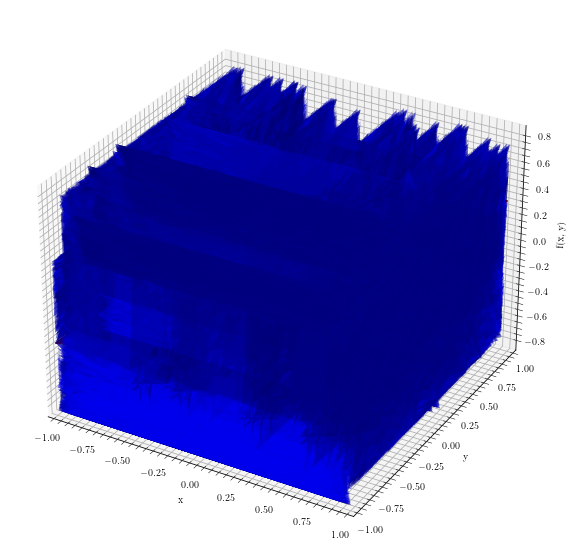

In [62]:
x_min, x_max = x_domain_values.min(), x_domain_values.max()
y_min, y_max = y_domain_values.min(), y_domain_values.max()

# x_grid, y_grid = np.meshgrid(
#     np.linspace(x_min, x_max, 1000),
#     np.linspace(y_min, y_max, 1000))

x_grid, y_grid = np.meshgrid(x_domain_values, y_domain_values)

# grid_points = np.c_[
#     x_grid.ravel(), 
#     y_grid.ravel()]

# z_true = lambdified_f_function_of_x_and_y(grid_points[:, 0], grid_points[:, 1]).reshape(x_grid.shape)

z_true = lambdified_f_function_of_x_and_y(x_grid, y_grid).reshape(x_grid.shape)
z_model = (model_predictions * lambdified_Y_function_of_y(y_grid[:, 1])).reshape(x_grid.shape)

surface_plot_figure = plt.figure(figsize = (18, 10))
surface_plot_axis = surface_plot_figure.add_subplot(1, 1, 1, projection = '3d')

surface_plot_axis.plot_surface(x_grid, y_grid, z_true, color = 'red', alpha = 0.3, label = 'True Function')
surface_plot_axis.plot_surface(x_grid, y_grid, z_model, color = 'blue', alpha = 0.3, label = 'Model Prediction')

surface_plot_axis.set_xlabel('x')
surface_plot_axis.set_ylabel('y')
surface_plot_axis.set_zlabel('f(x, y)')

surface_plot_axis.set_xlim(-1, 1)
surface_plot_axis.set_ylim(-1, 1)

surface_plot_axis.view_init(elev = 30, azim = -60) 

# plt.legend(fontsize = 20, shadow = True)
plt.tight_layout()
plt.show()

##### (6.5.2.5): Surface Subtraction Plot for $X^{\text{DNN}}(x) Y(y)$:

In [53]:
x_min, x_max = x_domain_values.min(), x_domain_values.max()
y_min, y_max = y_domain_values.min(), y_domain_values.max()

x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, 1000),
    np.linspace(y_min, y_max, 1000))

grid_points = np.c_[
    x_grid.ravel(), 
    y_grid.ravel()]

z_true = lambdified_f_function_of_x_and_y(grid_points[:, 0], grid_points[:, 1]).reshape(x_grid.shape)
z_model = (model_predictions.ravel() * lambdified_Y_function_of_y(y_domain_values)).reshape(x_grid.shape)

surface_plot_figure = plt.figure(figsize = (18, 10))
surface_plot_axis = surface_plot_figure.add_subplot(1, 1, 1, projection = '3d')

surface_plot_axis.plot_surface(x_grid, y_grid, np.abs(z_true - z_model), color = 'gray', alpha = 0.3, label = 'True Function')

surface_plot_axis.set_xlabel('x')
surface_plot_axis.set_ylabel('y')
surface_plot_axis.set_zlabel('f(x, y)')

surface_plot_axis.set_xlim(-1, 1)
surface_plot_axis.set_ylim(-1, 1)

surface_plot_axis.view_init(elev = 30, azim = -60) 

plt.legend(fontsize = 20, shadow = True)
plt.tight_layout()
plt.show()

ValueError: cannot reshape array of size 10000 into shape (1000,1000)